In [2]:
import numpy as np
from numpy import sinc, inf, zeros_like, zeros, ones_like, ones
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import math
import ecvproc
import admproc

In [5]:
#font_family = 'serif'
font_family = 'sans'
font_size = 14
params= {'text.usetex': False,
#         'mathtext.fontset': 'stix',
         'mathtext.fontset': 'stixsans',
         'font.size': font_size,
         'axes.labelsize': font_size,
         'font.family': font_family,
         'figure.figsize': [4, 3.2],
         'legend.fontsize': font_size,
         'svg.fonttype':'none'
         }
plt.rcParams.update(params)

def sci_notation(num, decimal_digits=1, precision=None, exponent=None):
    if not exponent: 
        exponent = int(math.floor(math.log10(abs(num))))
    coeff = round(num/float(10**exponent), decimal_digits)
    if not precision:
        precision = decimal_digits
    
    return r"\${0:.{2}f}\times 10^{{{1:d}}}\$".format(coeff, exponent, 
                                                     precision)

## $\mathrm{n^{++}}$-InAs

In [11]:
# experemental data
cap, volt = ecvproc.cv_read('./data/8-0-866_back-3@0.000.CV', model='Cp')
# simulation results 
data = np.genfromtxt('./data/cap_volt_ion_2e+18.dat')
cc = -data[:,1]
vv = data[:,0]
# linear fitting
cap_fit, volt_fit, doping = ecvproc.lin_fit(cc, vv, 
                                            vmin=0.2, vmax=0.3 )

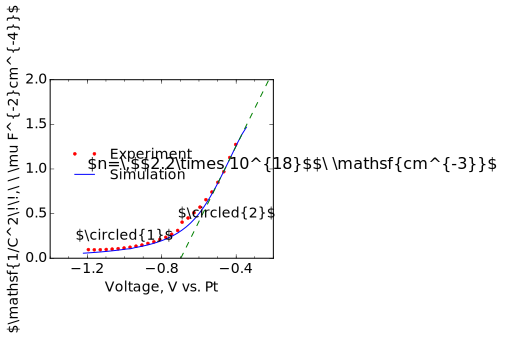

In [13]:
fig = plt.figure()
cv = fig.add_subplot(111)
cv_dat, sim, fit = cv.plot(volt[::4], 1/cap[::4]**2, 'r.',
                            vv-0.71, 1/cc**2, 'b',
                            volt_fit-0.71, cap_fit, 'g--')
cv.set_xlabel('Voltage, V vs. Pt')
cv.set_ylabel('\$\mathsf{1/C^2\!\!,\ \ \mu F^{-2}cm^{-4}}\$')

leg = fig.legend((cv_dat, sim),
                ('Experiment','Simulation'),
                'right', bbox_to_anchor=(0.7,0.75))
leg.draw_frame(False)

cv.text(-1.2, 1, 
        '\$n=\,\$'+sci_notation(-doping)+'\$\ \mathsf{cm^{-3}}\$',
        fontsize=16)
#cv.annotate('(a)', xy=(1, 0), xycoords='axes fraction',fontsize=16,
#            xytext=(-10, 10), textcoords='offset points',
#            ha='right', va='bottom')

cv.xaxis.set_major_locator(ticker.MultipleLocator(0.4))
cv.xaxis.set_minor_locator(ticker.MultipleLocator(0.1))
#plt.tight_layout()

cv.text(-1, 0.25, '\$\\circled{1}$', ha="center", va="center")
cv.text(-0.45, 0.5, '\$\\circled{2}$', ha="center", va="center")

name1 = 'IP_InAs_CV_fig1'
plt.savefig(name1+'.svg', transparent=True)

## epi-InAs

In [8]:
# experemental data
d = admproc.Data('./data/InAs-609-1_7.dat')
cap = d.cs()*1e6/0.1
volt = d.voltage
# simulation results 
data = np.genfromtxt('./data/cap_volt_1e+15.dat')
cc = -data[:,1]
vv = data[:,0]
# linear fitting
cap_fit, volt_fit, doping = ecvproc.lin_fit(cc, vv, 
                                            vmin=-0.05, vmax=-0.01
                                            #vmin=-0.4, vmax= -0.3
                                            )

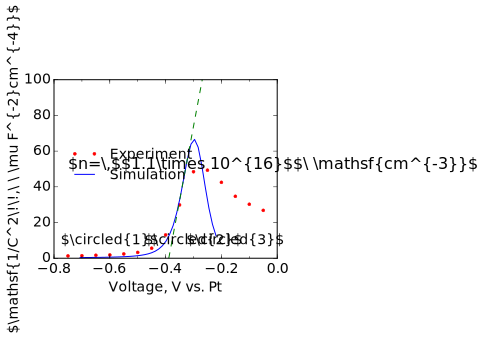

In [10]:
fig = plt.figure()
cv = fig.add_subplot(111)
cv_dat, sim, fit = cv.plot(volt, 1/cap**2, 'r.',
                            vv-0.3, 1/cc**2, 'b',
                            volt_fit-0.3, cap_fit, 'g--')
#cv.set_xlim(-1.4, 0)
cv.set_xlabel('Voltage, V vs. Pt')
cv.set_ylabel('\$\mathsf{1/C^2\!\!,\ \ \mu F^{-2}cm^{-4}}\$')

leg = fig.legend((cv_dat, sim),
                ('Experiment','Simulation'),
                'right', bbox_to_anchor=(0.7,.75))
leg.draw_frame(False)

cv.text(-0.75, 50, 
        '\$n=\,\$'+sci_notation(-doping)+'\$\ \mathsf{cm^{-3}}\$',
        fontsize=16)
#cv.annotate('(b)', xy=(1, 0), xycoords='axes fraction',fontsize=16,
#            xytext=(-10, 10), textcoords='offset points',
#            ha='right', va='bottom')

cv.xaxis.set_major_locator(ticker.MultipleLocator(0.2))
cv.xaxis.set_minor_locator(ticker.MultipleLocator(0.1))
#plt.tight_layout()

cv.text(-0.6, 10, '\$\\circled{1}$', ha="center", va="center")
cv.text(-0.3, 10, '\$\\circled{2}$', ha="center", va="center")
cv.text(-0.15, 10, '\$\\circled{3}$', ha="center", va="center")

name2 = 'IP_InAs_CV_fig2'
plt.savefig(name2+'.svg', transparent=True)

## n-GaAs

In [3]:
# experemental data
cap, volt = ecvproc.cv_read('./data/BlueSlice-2@0.000.CV', model='Cp')
# linear fitting
cap = cap[2:70:3]
volt = volt[2:70:3]
cap_fit, volt_fit, doping = ecvproc.lin_fit(cap, volt, 
                                            vmin=-0.8, vmax= 0.2
                                            )

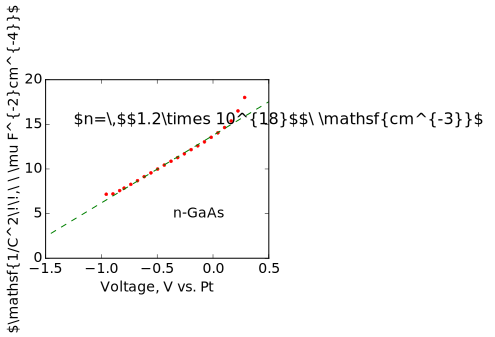

In [7]:
fig = plt.figure()
cv = fig.add_subplot(111)
cv_dat, fit = cv.plot(volt, 1/cap**2, 'r.',
                            volt_fit, cap_fit, 'g--')
#cv.set_xlim(-1.4, 0)
cv.set_xlabel('Voltage, V vs. Pt')
cv.set_ylabel('\$\mathsf{1/C^2\!\!,\ \ \mu F^{-2}cm^{-4}}\$')


cv.text(-1.25, 15, 
        '\$n=\,\$'+sci_notation(-doping)+'\$\ \mathsf{cm^{-3}}\$',
        fontsize=16)
#cv.annotate('(b)', xy=(1, 0), xycoords='axes fraction',fontsize=16,
#            xytext=(-10, 10), textcoords='offset points',
#            ha='right', va='bottom')

#cv.xaxis.set_major_locator(ticker.MultipleLocator(0.2))
#cv.xaxis.set_minor_locator(ticker.MultipleLocator(0.1))
#plt.tight_layout()
cv.text(-0.125, 5, 'n-GaAs', va='center', ha='center')
cv.set_xlim(-1.5, 0.5)
cv.set_ylim(0, 20)
name3 = 'IP_InAs_CV_fig3'
plt.savefig(name3+'.svg', transparent=True)